In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('iris-data.csv')

In [4]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3000x1500 with 0 Axes>

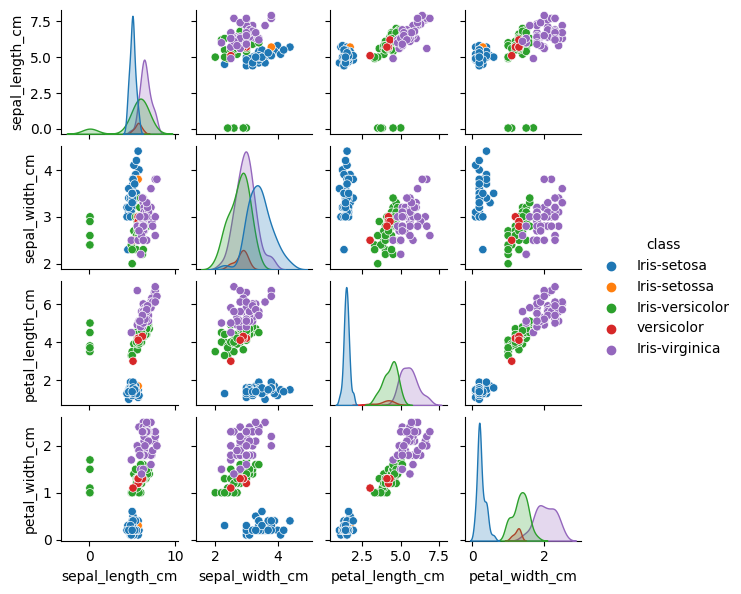

In [8]:
plt.figure(figsize=(30, 15))
sns.pairplot(df, hue='class', size=1.5)

In [9]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [10]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

In [11]:
final_df = df[df['class'] != 'Iris-virginica']

In [12]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


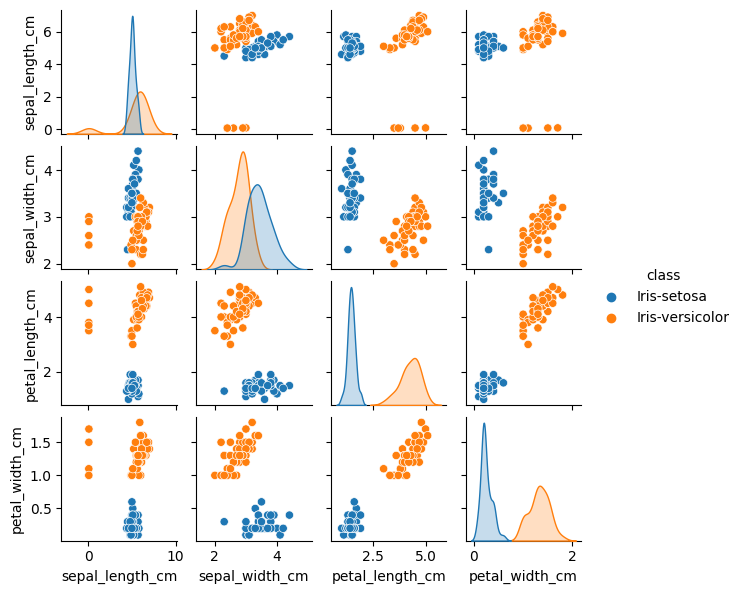

In [13]:
sns.pairplot(final_df, hue='class', size=1.5)

array([[<AxesSubplot: title={'center': 'sepal_length_cm'}>]], dtype=object)

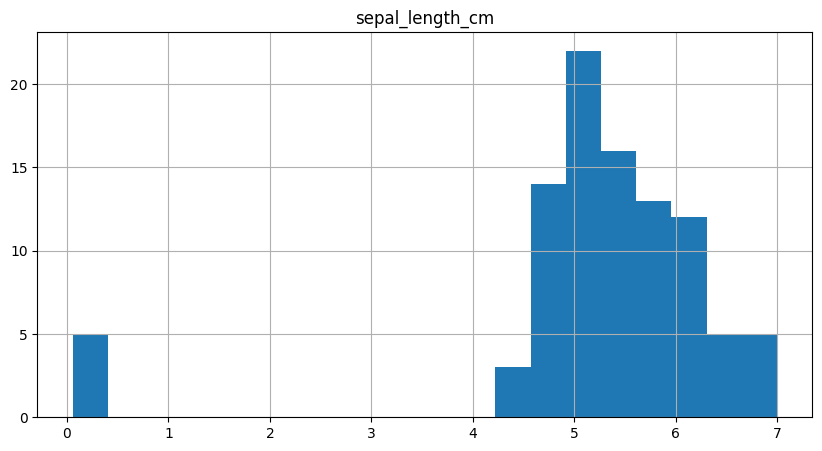

In [14]:
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))


array([[<AxesSubplot: title={'center': 'sepal_length_cm'}>]], dtype=object)

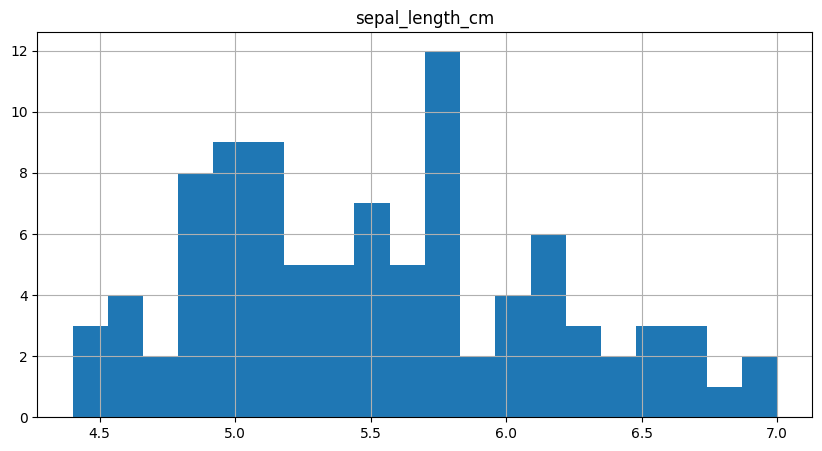

In [15]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

In [16]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


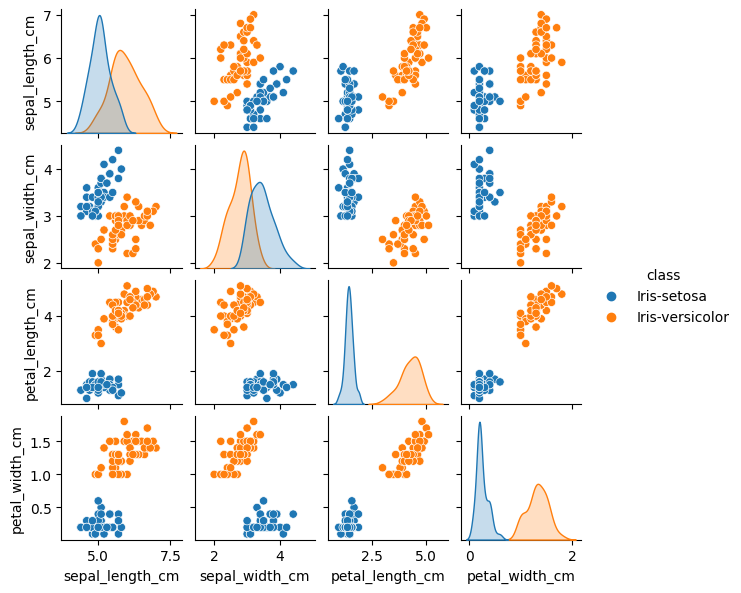

In [17]:
sns.pairplot(final_df, hue='class', size=1.5)

In [18]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [19]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)

scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=0)

In [20]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()
print(y_tr_arr.shape)

(75, 1)


In [21]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_ts_arr.shape)
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

Input Shape (75, 4)
Output Shape (19, 4)


In [22]:
import math
def get_cost(m,Y_T,final_result):
    return (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))

In [23]:
def update_theta(w,b,m,X,Y,final_result,alpha):
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    w = w - (alpha * (dw.T))
    b = b - (alpha * db)
    return w,b

In [24]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [25]:
def run_gradient_descent(w,b,X,Y,alpha,num_iterations):
    gd_iteration_temp_ans=pd.DataFrame(columns=['Min-Iteration','cost','alpha'])
    iter_num=0
    result_idx=0
    flag=0
    this_cost_prev=10
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost','alpha'])
    for each_iter in range(num_iterations):
        # Y_hat=predict_Y(b,theta,X)

        final_result = sigmoid_activation(np.dot(w,X.T)+b)
        Y_T = Y.T
        m = X.shape[0]
        this_cost = get_cost(m,Y_T,final_result) #gets cost
        
        if abs(this_cost-this_cost_prev)<0.00001 and flag==0:
          gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)
          flag=1
        
        this_cost_prev=this_cost
        prev_b=b
        prev_theta=w
        
        # b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        w,b=update_theta(w,b,m,X,Y,final_result,alpha)
        
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost,alpha]
        result_idx=result_idx+1
        iter_num +=1
        # print(b)
    print("For alpha= "+str(alpha)+" Final Estimate of b and theta :",b,w)
    return gd_iterations_df,b,w,gd_iteration_temp_ans

In [26]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred


In [27]:
gd_iteration_ans=pd.DataFrame(columns=['Min-Iteration','cost','alpha'])

In [28]:
gd_iteration_ans

,Min-Iteration,cost,alpha


Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)


For alpha= 0.001 Final Estimate of b and theta : -0.12173449166217716 [[-0.71160751  0.90450872 -1.07918802 -1.08805635]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.002 Final Estimate of b and theta : -0.17971482335297392 [[-0.83491137  1.14577245 -1.32849223 -1.34881074]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.003 Final Estimate of b and theta : -0.21806375778183978 [[-0.90174876  1.29379683 -1.47594392 -1.50539834]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.004 Final Estimate of b and theta : -0.24679702545518112 [[-0.94702653  1.40152556 -1.58116495 -1.61826129]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.005 Final Estimate of b and theta : -0.2697837004235297 [[-0.98103321  1.48650978 -1.66311928 -1.706823  ]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.006 Final Estimate of b and theta : -0.2889386915122658 [[-1.00815439  1.5568166  -1.73030526 -1.77985413]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.007 Final Estimate of b and theta : -0.3053533134907398 [[-1.03065162  1.61684281 -1.78727254 -1.84207894]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.008 Final Estimate of b and theta : -0.3197096805165784 [[-1.04983856  1.66925564 -1.83674387 -1.89633915]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.009 Final Estimate of b and theta : -0.33246303674408695 [[-1.06654354  1.71579767 -1.88047902 -1.94447958]]
Number of Features 4


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/1915655010.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_temp_ans=gd_iteration_temp_ans.append({'Min-Iteration':each_iter,'cost':this_cost,'alpha':alpha},ignore_index=True)


For alpha= 0.01 Final Estimate of b and theta : -0.34393251863633173 [[-1.08132137  1.7576713  -1.91968159 -1.98776689]]


/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_2115/840926035.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

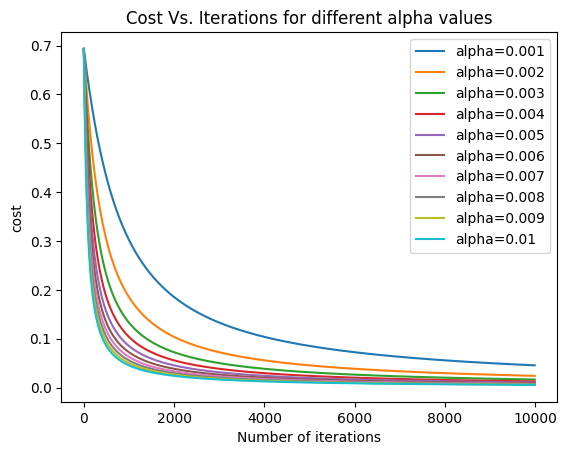

In [29]:
for i in range(1,11):
  n_features = X_tr_arr.shape[1]
  print('Number of Features', n_features)
  w, b = weightInitialization(n_features)
  alpha=i/1000
  alpha_df_i,b,theta,gd_iteration_temp_ans=run_gradient_descent(w,b,X_tr_arr,y_tr_arr,alpha,num_iterations=10000)
  gd_iteration_ans=gd_iteration_ans.append(gd_iteration_temp_ans)
  plt.plot(alpha_df_i['iteration'],alpha_df_i['cost'],label="alpha="+str(alpha))

plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')


In [30]:
gd_iteration_ans = gd_iteration_ans.reset_index(drop=True)
gd_iteration_ans

,Min-Iteration,cost,alpha
0,6277.0,0.069378,0.001
1,4542.0,0.049535,0.002
2,3750.0,0.040693,0.003
3,3271.0,0.035398,0.004
4,2941.0,0.031774,0.005
5,2695.0,0.029098,0.006
6,2504.0,0.027002,0.007
7,2349.0,0.025312,0.008
8,2220.0,0.023912,0.009
9,2111.0,0.022720,0.010


In [31]:
final_train_pred = sigmoid_activation(np.dot(theta,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(theta,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Training Accuracy 1.0
Test Accuracy 1.0


In [32]:
import math
import numpy as np

MSE = np.square(np.subtract(y_ts_pred.T,y_ts_arr)).mean()
rsme = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(rsme)

Root Mean Square Error:

0.0


In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [34]:
clf.fit(X_tr_arr, y_tr_arr)

/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
print (clf.intercept_, clf.coef_)

[-0.36387505] [[-0.75620362  1.17564743 -1.34781812 -1.39830344]]


In [36]:
pred = clf.predict(X_ts_arr)

In [37]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))


Accuracy from sk-learn: 1.0
